In [1]:
import csv
import pandas as pd
import numpy as np

In [10]:
file = open("log.txt", 'r')
lines = file.readlines()
col = [x.strip(' ') for x in lines[9].split('|')]
col = col[:-1]
nline=len(lines)
print(col,' ',nline)
file.close()

['', 'time', 'icao24', 'lat', 'lon', 'velocity', 'heading', 'vertrate', 'callsign', 'onground', 'alert', 'spi', 'squawk', 'baroaltitude', 'geoaltitude', 'lastposupdate', 'lastcontact', 'hour']   1417397


In [3]:
#reader = csv.reader(data, delimiter='|')
#type_list=[str, np.int32, str, np.float64, np.float64, np.float64, np.float64, str, bool, bool, bool, np.int32, np.float64, np.float64, np.float64, np.float64, np.int32]
#type_dict = dict(zip(col, type_list))

In [57]:
n_to_read = 1000
data = pd.read_csv('log.txt', sep= '|',
                   names=col, 
                   nrows=n_to_read, 
                   index_col=False, 
                   skipinitialspace=True, 
                   skiprows=11, 
                   na_values=['NULL','NULL     '], 
                   false_values=['false    ','false '],
                   low_memory=False)
data = data.dropna(axis=1)

SyntaxError: invalid syntax (<ipython-input-57-967d217feda5>, line 12)

In [60]:
for name in ['lat', 'lon','velocity','heading','vertrate','geoaltitude','lastposupdate']:
    data[name] = pd.to_numeric(data[name], errors='coerce')
data.dtypes

time               int64
icao24            object
lat              float64
lon              float64
velocity         float64
heading          float64
vertrate         float64
onground            bool
alert               bool
spi                 bool
squawk            object
baroaltitude     float64
geoaltitude      float64
lastposupdate    float64
lastcontact      float64
hour               int64
dtype: object

In [61]:
import matplotlib.pyplot as plt

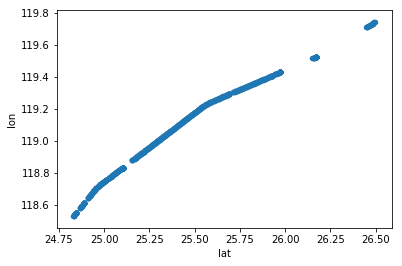

In [65]:
data.plot.scatter(x='lat', y='lon')

In [63]:
data[data.onground==True].loc[:,'icao24'].count()+data[data.alert==True].loc[:,'icao24'].count()+data[data.spi==True].loc[:,'icao24'].count()

0

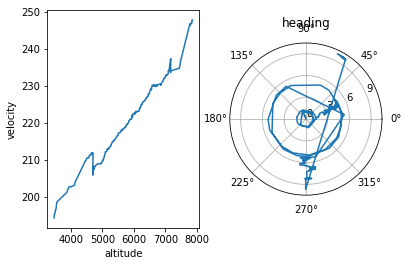

In [135]:
plt.figure(1)


plt.subplot(121)
plt.plot('geoaltitude', 'velocity', data=data)
plt.xlabel('altitude')
plt.ylabel('velocity')


ax = plt.subplot(122, projection='polar')
ax.plot(data.heading, data.index/100)
ax.set_rticks([0,3,6,9])
ax.grid(True)
ax.set_title('heading', va='bottom')


plt.savefig('Analyse.png')
plt.show()

In [67]:
from mpl_toolkits.mplot3d import Axes3D

c:\users\hong\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


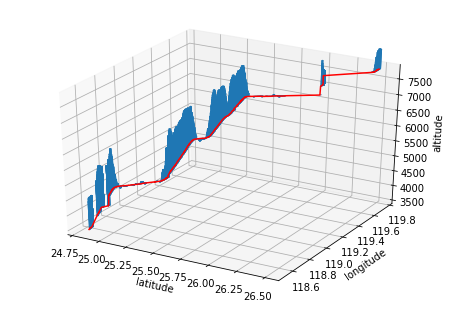

In [117]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(data.lat, data.lon, data.geoaltitude, c='r')
ax.bar3d(data.lat, data.lon, data.geoaltitude, 0.01, 0.01,data.vertrate*100, shade=False)
ax.set_xlabel('latitude')
ax.set_ylabel('longitude')
ax.set_zlabel('altitude')
plt.savefig('itinerary.jpg')
plt.show()